In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od

import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset_url= 'https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009'
od.download(dataset_url)

Skipping, found downloaded files in ".\red-wine-quality-cortez-et-al-2009" (use force=True to force download)


In [3]:
wine= pd.read_csv('./red-wine-quality-cortez-et-al-2009/winequality-red.csv')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
wine.values[0]

array([ 7.4   ,  0.7   ,  0.    ,  1.9   ,  0.076 , 11.    , 34.    ,
        0.9978,  3.51  ,  0.56  ,  9.4   ,  5.    ])

In [5]:
wine.rename(columns={'fixed acidity':'fixed_acidity', 
                         'volatile acidity':'volatile_acidity',
                         'citric acid':'citric_acid',
                         'residual sugar':'residual_sugar',
                         'free sulfur dioxide':'free_sulfur_dioxide',
                         'total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)

In [6]:
wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

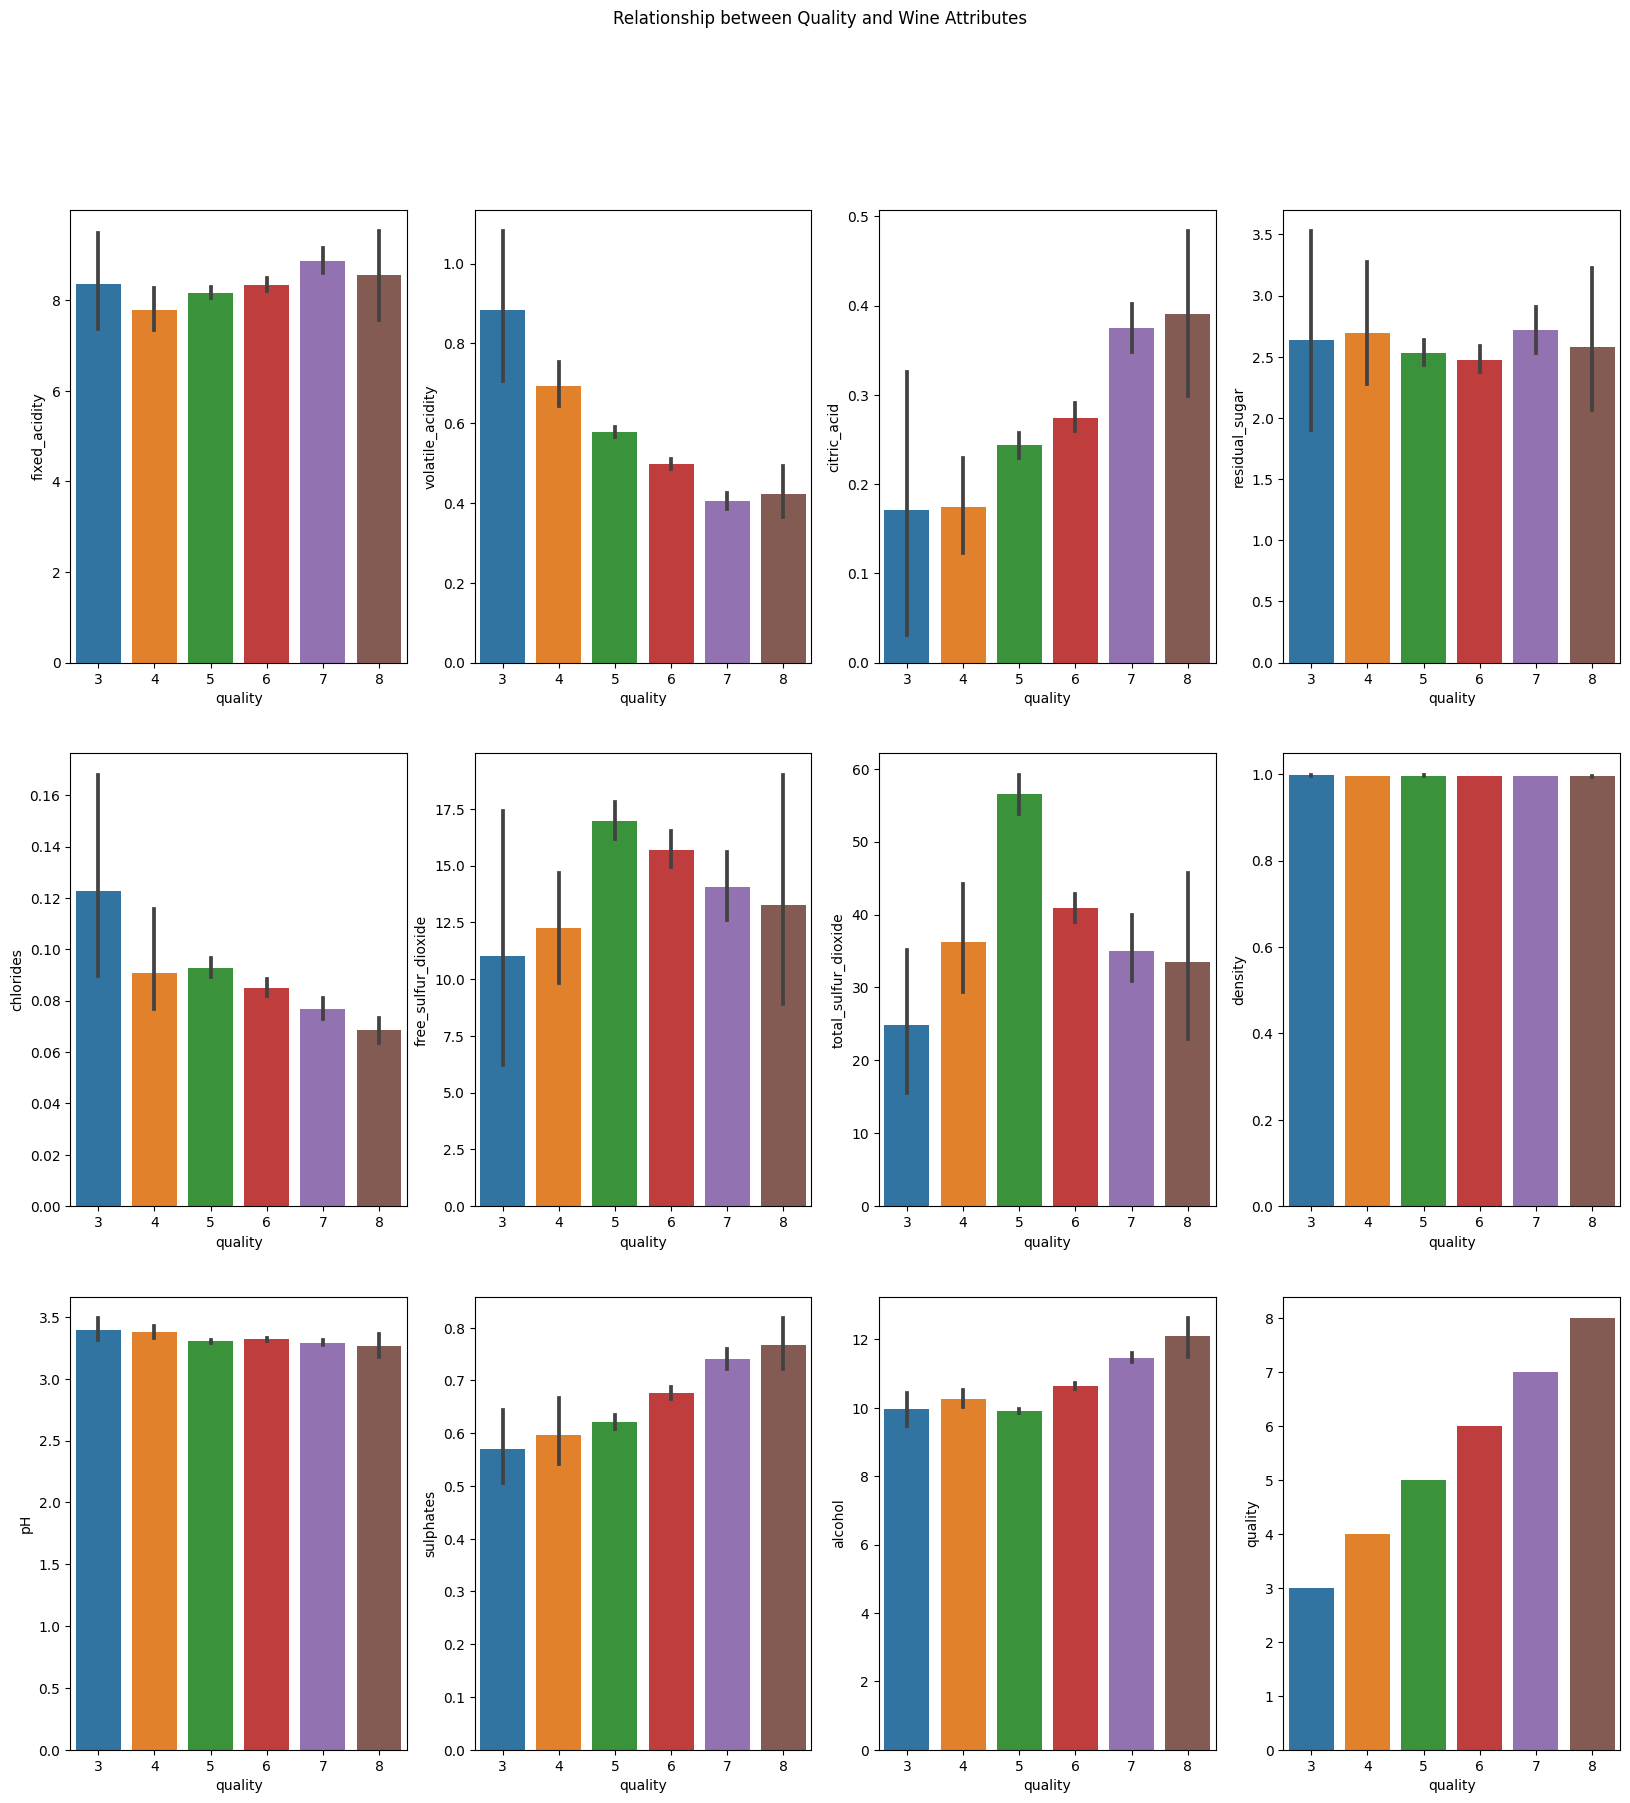

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a list of the column names to plot
cols_to_plot = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 
                'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 
                'pH', 'sulphates', 'alcohol','quality']

# create a subplot with a grid of 4 rows and 3 columns
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20,20))

# flatten the axes array to make it easier to plot each bar chart
axes = axes.flatten()

# loop over the column names and plot a bar chart on each axis
for i, col in enumerate(cols_to_plot):
    sns.barplot(x='quality', y=col, data=wine, ax=axes[i])
    
# add a title for the entire subplot
fig.suptitle('Relationship between Quality and Wine Attributes')

# display the plot
plt.show()


In [8]:
import plotly.express as px
import pandas as pd
import numpy as np

# Calculate the correlation matrix
corr = wine.corr()

# Create the heatmap
fig4 = px.imshow(corr, color_continuous_scale='Blues')

# Add text annotations for each cell in the matrix
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        val = np.round(corr.iloc[i, j], 4)
        if val > 0.6:
            color = 'red'
        else:
            color = 'black'
        fig4.add_annotation(x=j, y=i, text=val, font=dict(color=color))


# Update the layout to increase the size of the plot
fig4.update_layout(width=1000, height=1000)

# Show the heatmap
fig4.show()



In [9]:
wine['quality'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

## we can consider that if quality is greater then or equal to


In [10]:
def replacenum(num):
    if(num<7):
        return 0
    else:
        return 1

In [11]:
wine['quality'] = wine['quality'].apply(lambda x: replacenum(x))


In [12]:
wine.quality.value_counts(
    
)

0    1382
1     217
Name: quality, dtype: int64

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import GridSearchCV, cross_val_predict


In [14]:
data= pd.read_csv("./red-wine-quality-cortez-et-al-2009/winequality-red.csv")

In [15]:
data['quality']= data['quality'].apply(lambda x: replacenum(x))


In [17]:
X= data.iloc[:, :11]
y= data.iloc[:,11]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
class CustomTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, custom_param):
        self.custom_param = custom_param
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X= X.dropna()


        return X+ self.custom_param

In [78]:


# define the pipeline
# pipe using SVC()
pipe1 = Pipeline([
    ("custom_transform",CustomTransformer(5)),
    ("scaler", StandardScaler()),
    ("clf", GridSearchCV(
        estimator=SVC(),
        param_grid={
            'C':np.arange(0.1,5.1,0.1),
            'kernel':['rbf','linear'],
            'gamma':np.arange(0.1,5.1,0.1)
        },
        cv=5,
        return_train_score=False
    ))
])

# fit the pipeline
pipe1.fit(X_train, y_train)

# print the best score and parameters
print(f"Best score: {pipe1['clf'].best_score_}")
print(f"Best params: {pipe1['clf'].best_params_}")


Best score: 0.907748161764706
Best params: {'C': 2.9000000000000004, 'gamma': 0.4, 'kernel': 'rbf'}


In [81]:
# define the pipeline
# pipe using RFC
pipe2 = Pipeline([
    ("custom_transform",CustomTransformer(5)),
    ("scaler", StandardScaler()),
    ("clf", GridSearchCV(
        estimator=RandomForestClassifier(),
        param_grid={
            'n_estimators':np.arange(10,251,10),
            'max_depth':np.arange(5,51,1)
        },
        cv=5,
        return_train_score=False
    ))
])



# fit the pipeline
pipe2.fit(X_train, y_train)

# print the best score and parameters
print(f"Best score: {pipe2['clf'].best_score_}")
print(f"Best params: {pipe2['clf'].best_params_}")


Best score: 0.9116574754901962
Best params: {'max_depth': 21, 'n_estimators': 70}


In [ ]:
# define the pipeline
# pipe using XGboost
from xgboost import XGBClassifier
pipe3 = Pipeline([
    ("custom_transform",CustomTransformer(5)),
    ("scaler", StandardScaler()),
    ("clf", GridSearchCV(
        estimator=XGBClassifier(),
        param_grid={
            'n_estimators':np.arange(10,251,10),
            'max_depth':np.arange(5,51,5)
        },
        cv=5,
        return_train_score=False
    ))
])

# fit the pipeline
pipe3.fit(X_train, y_train)

# print the best score and parameters
print(f"Best score: {pipe3['clf'].best_score_}")
print(f"Best params: {pipe3['clf'].best_params_}")


In [20]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [21]:
rfc_model =RandomForestClassifier(n_estimators=71,max_depth= 21)
rfc_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=21, n_estimators=71)

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import pickle
rfc_model = RandomForestClassifier(n_estimators=71, max_depth=21)

rfc_model.fit(X_train, y_train)

with open('rfc_model.pkl', 'wb') as file:
    pickle.dump(rfc_model, file)

In [29]:
import pickle
saved_model= pickle.dumps(rfc_model)
rfc_from_pickle = pickle.loads(saved_model)
rfc_from_pickle.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [30]:
rfc_model.predict(
    [[7.4,	0.700, 0.00,	1.9,	0.076, 11.0, 34.0, 0.99780, 3.51,	0.56,	9.4]])


array([0], dtype=int64)

In [31]:
rows_with_1= data[data.iloc[:,11]==1]
rows_with_1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.00,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.50,1
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.50,1
37,8.1,0.38,0.28,2.1,0.066,13.0,30.0,0.99680,3.23,0.73,9.70,1
62,7.5,0.52,0.16,1.9,0.085,12.0,35.0,0.99680,3.38,0.62,9.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1541,7.4,0.25,0.29,2.2,0.054,19.0,49.0,0.99666,3.40,0.76,10.90,1
1544,8.4,0.37,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.20,1
1549,7.4,0.36,0.30,1.8,0.074,17.0,24.0,0.99419,3.24,0.70,11.40,1
1555,7.0,0.56,0.17,1.7,0.065,15.0,24.0,0.99514,3.44,0.68,10.55,1


In [32]:
rows_with_0= data[data.iloc[:,11]==0]
rows_with_0

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0
